# Persiapan Data

## Import Libraries

In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer


## Load Data

In [2]:
df = pd.read_excel('Dataset Lomba Data Analytics TECHFEST 2025.xlsx')

## Cek anomali

In [3]:
df.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07


In [4]:
df.describe()

,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
count,34.000000,3.700000e+01,3.700000e+01,3.600000e+01,3.500000e+01,34.000000,3.800000e+01,3.800000e+01,38.000000
mean,73.770294,2.344045e+13,2.380704e+13,1.946077e+07,5.120716e+06,10.089118,5.403080e+05,7.956650e+07,5.273421
std,3.763013,1.823356e+13,1.852826e+13,6.200552e+07,3.966609e+06,5.183509,8.182349e+05,5.973829e+07,2.924139
min,63.010000,6.172420e+12,6.155410e+12,7.201000e+05,1.795894e+05,4.250000,2.443399e+04,1.687000e+07,1.800000
25%,72.397500,1.115211e+13,1.151835e+13,2.105975e+06,2.564899e+06,6.240000,9.806901e+04,4.823325e+07,4.400000
50%,73.910000,1.745338e+13,1.746738e+13,4.402000e+06,4.225661e+06,8.425000,2.179008e+05,6.392100e+07,4.890000
75%,75.017500,2.769023e+13,2.886221e+13,8.800500e+06,6.051469e+06,12.252500,5.840892e+05,7.735900e+07,5.175000
max,83.550000,8.200830e+13,8.192189e+13,3.718040e+08,1.609953e+07,26.030000,3.443026e+06,3.226190e+08,20.490000


In [5]:
df.isnull().sum()

Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         1
Realisasi TKDD                                                    1
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          3
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

## Mencari hubungan antar kolom dan menangani anomali data

### Korelasi antar kolom

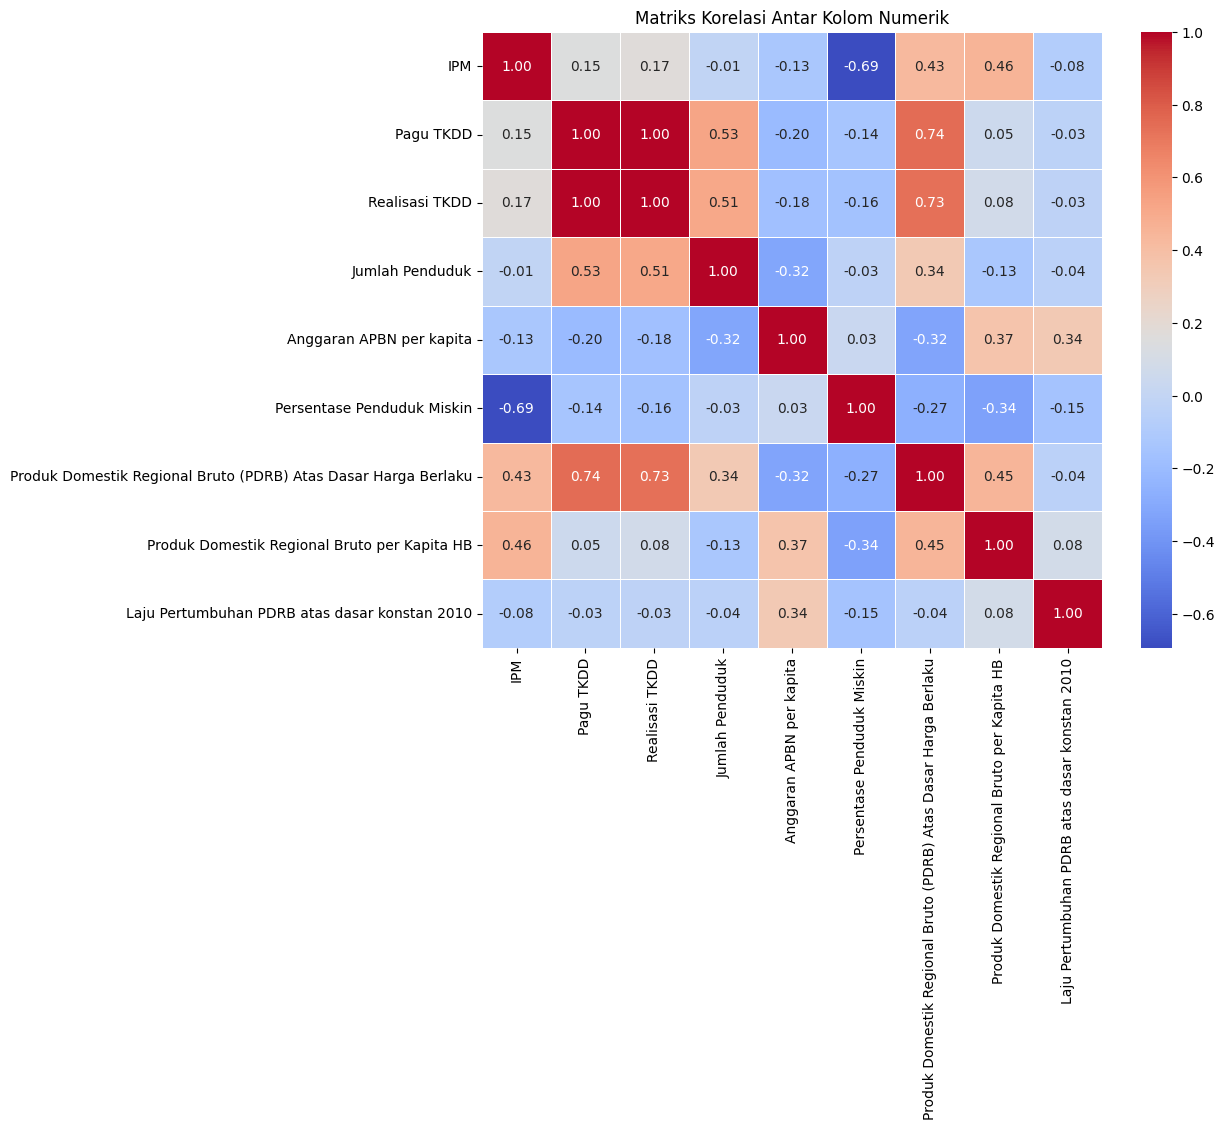

In [6]:
# Hitung matriks korelasi
corr_matrix = df.corr(numeric_only=True)

# Tampilkan matriks korelasi sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Kolom Numerik")
plt.show()

### Cek multikolinearitas

In [7]:
# Pilih kolom numerik (kecuali Provinsi)
numeric_cols = [
    'IPM',
    'Pagu TKDD',
    'Realisasi TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010'
]

# Pastikan kolom ada di dataframe
numeric_cols = [col for col in numeric_cols if col in df.columns]

# Drop baris yang memiliki missing value pada kolom numerik
X = df[numeric_cols].dropna()

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             feature         VIF
0                                                IPM    0.048173
1                                          Pagu TKDD  974.952767
2                                     Realisasi TKDD  856.842135
3                                    Jumlah Penduduk    1.763216
4                           Anggaran APBN per kapita    3.197032
5                         Persentase Penduduk Miskin    1.247432
6  Produk Domestik Regional Bruto (PDRB) Atas Das...   13.683343
7       Produk Domestik Regional Bruto per Kapita HB    7.200702
8      Laju Pertumbuhan PDRB atas dasar konstan 2010    1.188268


### Mengatasi missing value pada kolom Jumlah Penduduk dengan cara membagi PDRDB atas dasar harga berlaku dengan pdrb per kapita hb

In [8]:
# Daftar provinsi yang ingin diisi
provinsi_target = ['PAPUA PEGUNUNGAN', 'PAPUA SELATAN']

for prov in provinsi_target:
    mask = df['Provinsi'] == prov
    pdrb = df.loc[mask, 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku']
    pdrb_perkapita = df.loc[mask, 'Produk Domestik Regional Bruto per Kapita HB']
    # Hitung jumlah penduduk (PDRB / PDRB per kapita)
    jumlah_penduduk = pdrb * 1000000000/ pdrb_perkapita
    # Simpan ke kolom Jumlah Penduduk
    df.loc[mask, 'Jumlah Penduduk'] = jumlah_penduduk
    print(f"Jumlah Penduduk {prov} diisi dengan nilai: {jumlah_penduduk.values[0]:,.0f}")

Jumlah Penduduk PAPUA PEGUNUNGAN diisi dengan nilai: 1,448,369
Jumlah Penduduk PAPUA SELATAN diisi dengan nilai: 534,413


### Mengisi kolom anggaran apbn per kapita pada papua pegunungan dan papua selatan dengan cara membagi kolom realisasi tkdd dengan jumlah penduduk

In [9]:
# Isi Anggaran APBN per kapita untuk Papua Pegunungan dan Papua Selatan
provinsi_target = ['PAPUA PEGUNUNGAN', 'PAPUA SELATAN']

for prov in provinsi_target:
    mask = df['Provinsi'] == prov
    realisasi_tkdd = df.loc[mask, 'Realisasi TKDD']
    jumlah_penduduk = df.loc[mask, 'Jumlah Penduduk']
    anggaran_perkapita = realisasi_tkdd / jumlah_penduduk
    df.loc[mask, 'Anggaran APBN per kapita'] = anggaran_perkapita
    print(f"Anggaran APBN per kapita {prov} diisi dengan nilai: {anggaran_perkapita.values[0]:,.2f}")


Anggaran APBN per kapita PAPUA PEGUNUNGAN diisi dengan nilai: 8,852,548.90
Anggaran APBN per kapita PAPUA SELATAN diisi dengan nilai: 14,329,779.39


### Mengatasi missing value pada kolom IPM dengan menggunakan interpolasi

In [10]:
# Atasi missing value pada kolom IPM menggunakan interpolasi
df['IPM'] = df['IPM'].interpolate(method='linear')

# Tampilkan hasil interpolasi
print(df[['Provinsi', 'IPM']][df['IPM'].isnull() == False])
print('Missing value pada kolom IPM setelah interpolasi:', df['IPM'].isnull().sum())

                Provinsi     IPM
0                   ACEH  74.700
1                   BALI  78.010
2                 BANTEN  75.770
3               BENGKULU  74.300
4          DI YOGYAKARTA  81.090
5            DKI JAKARTA  83.550
6              GORONTALO  71.250
7                  JAMBI  73.730
8             JAWA BARAT  74.240
9            JAWA TENGAH  73.390
10            JAWA TIMUR  74.650
11      KALIMANTAN BARAT  70.470
12    KALIMANTAN SELATAN  74.660
13     KALIMANTAN TENGAH  73.730
14      KALIMANTAN TIMUR  78.200
15      KALIMANTAN UTARA  72.880
16  KEP. BANGKA BELITUNG  74.090
17             KEP. RIAU  79.080
18               LAMPUNG  72.480
19                MALUKU  72.750
20          MALUKU UTARA  70.980
21   NUSA TENGGARA BARAT  72.370
22   NUSA TENGGARA TIMUR  68.400
23                 PAPUA  63.010
24           PAPUA BARAT  67.470
25      PAPUA BARAT DAYA  68.966
26      PAPUA PEGUNUNGAN  70.462
27         PAPUA SELATAN  71.958
28          PAPUA TENGAH  73.454
29        

#### Cek kembali

In [11]:
df.isnull().sum()

Provinsi                                                          0
IPM                                                               0
Pagu TKDD                                                         1
Realisasi TKDD                                                    1
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          1
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

### Mengatasi Missing Value pada kolom Pagu TKDD dengan melakukan Interpolasi metode linear

In [12]:
df['Pagu TKDD'] = df['Pagu TKDD'].interpolate(method='linear')
df['Realisasi TKDD'] = df['Realisasi TKDD'].interpolate(method='linear')


#### Cek kembali

In [13]:
df.isnull().sum()

Provinsi                                                          0
IPM                                                               0
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          1
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

### Mengatasi Missing Value pada kolom Anggaran APBN di SULAWESI UTARA

In [14]:
provinsi_target = ['SULAWESI UTARA']

for prov in provinsi_target:
    mask = df['Provinsi'] == prov
    realisasi_tkdd = df.loc[mask, 'Realisasi TKDD']
    jumlah_penduduk = df.loc[mask, 'Jumlah Penduduk']
    anggaran_perkapita = realisasi_tkdd / jumlah_penduduk
    df.loc[mask, 'Anggaran APBN per kapita'] = anggaran_perkapita
    print(f"Anggaran APBN per kapita {prov} diisi dengan nilai: {anggaran_perkapita.values[0]:,.2f}")

Anggaran APBN per kapita SULAWESI UTARA diisi dengan nilai: 7,723,449.71


#### Cek kembali

In [15]:
df.isnull().sum()

Provinsi                                                          0
IPM                                                               0
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

### Mengisi kolom Persentase Penduduk Miskin menggunakan KNN

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Jika kolom target bukan numerik, ubah dulu
df['Persentase Penduduk Miskin'] = pd.to_numeric(df['Persentase Penduduk Miskin'], errors='coerce')

# Inisialisasi KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Imputasi hanya pada kolom numerik
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

#### Cek kembali

In [17]:
df.isnull().sum()

Provinsi                                                          0
IPM                                                               0
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        0
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

In [18]:
df

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.700,3.082148e+13,3.107456e+13,5.409200e+06,5.744761e+06,14.450,227018.20,41408000.0,4.23
1,BALI,78.010,1.115211e+13,1.106498e+13,4.374300e+06,2.529543e+06,4.250,274358.18,62294000.0,5.71
2,BANTEN,75.770,1.745338e+13,1.746738e+13,1.216700e+07,1.435636e+06,6.170,814122.03,66147000.0,4.81
3,BENGKULU,74.300,1.057008e+13,1.055979e+13,2.059400e+06,5.127605e+06,14.040,96583.09,46300000.0,4.28
4,DI YOGYAKARTA,81.090,1.035587e+13,1.024129e+13,3.712600e+06,2.758522e+06,11.040,180696.04,48360000.0,5.07
5,DKI JAKARTA,83.550,2.469499e+13,2.508018e+13,1.064000e+07,2.357160e+06,4.440,3443026.23,322619000.0,4.96
6,GORONTALO,71.250,6.172420e+12,6.155410e+12,1.198400e+06,5.136357e+06,15.150,51366.74,42341000.0,4.50
7,JAMBI,73.730,1.523207e+13,1.535267e+13,3.633200e+06,4.225661e+06,7.580,293780.01,79850000.0,4.67
8,JAWA BARAT,74.240,7.132176e+13,7.103169e+13,4.930680e+07,1.440606e+06,7.620,2625225.72,52652000.0,5.00
9,JAWA TENGAH,73.390,6.712969e+13,6.677206e+13,3.718040e+08,1.795894e+05,10.770,1695621.57,45167000.0,4.97


# EDA (lebih bersih)

### Statistik Deskriptif

In [19]:
df.describe()

,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
count,38.000000,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,38.000000,3.800000e+01,3.800000e+01,38.000000
mean,73.500789,2.336163e+13,2.372134e+13,1.848869e+07,5.529759e+06,10.237684,5.403080e+05,7.956650e+07,5.273421
std,3.683195,1.799204e+13,1.828379e+13,6.045117e+07,4.139804e+06,4.995597,8.182349e+05,5.973829e+07,2.924139
min,63.010000,6.172420e+12,6.155410e+12,5.344130e+05,1.795894e+05,4.250000,2.443399e+04,1.687000e+07,1.800000
25%,71.734500,1.139729e+13,1.153708e+13,1.936175e+06,2.639822e+06,6.452500,9.806901e+04,4.823325e+07,4.400000
50%,73.592000,1.860135e+13,1.870740e+13,4.115550e+06,4.557838e+06,9.139000,2.179008e+05,6.392100e+07,4.890000
75%,74.887500,2.694142e+13,2.802721e+13,8.124425e+06,7.413547e+06,12.822500,5.840892e+05,7.735900e+07,5.175000
max,83.550000,8.200830e+13,8.192189e+13,3.718040e+08,1.609953e+07,26.030000,3.443026e+06,3.226190e+08,20.490000


### Distribusi data

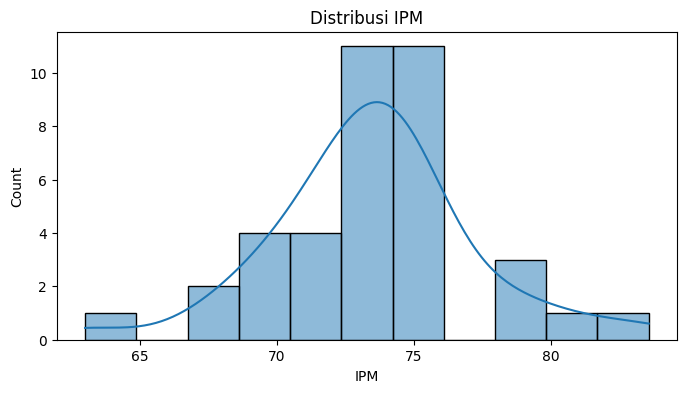

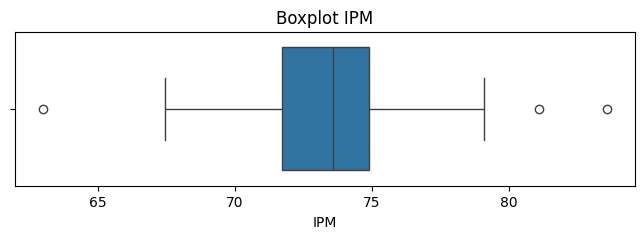

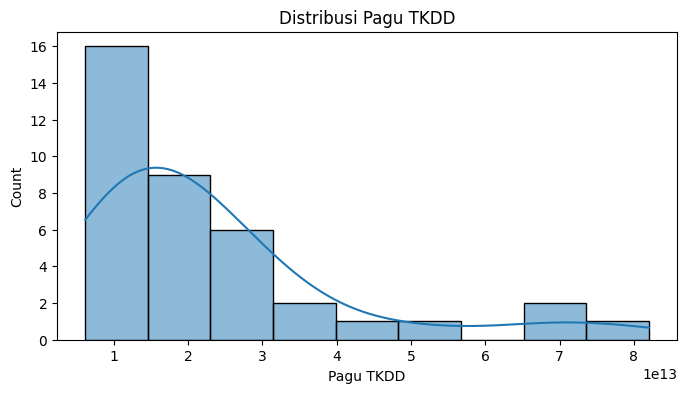

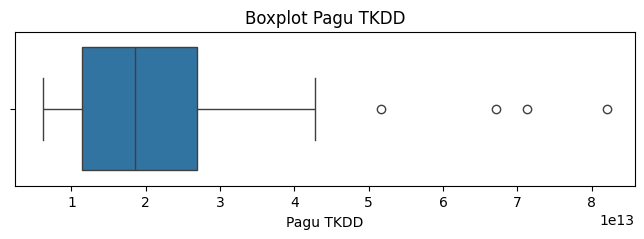

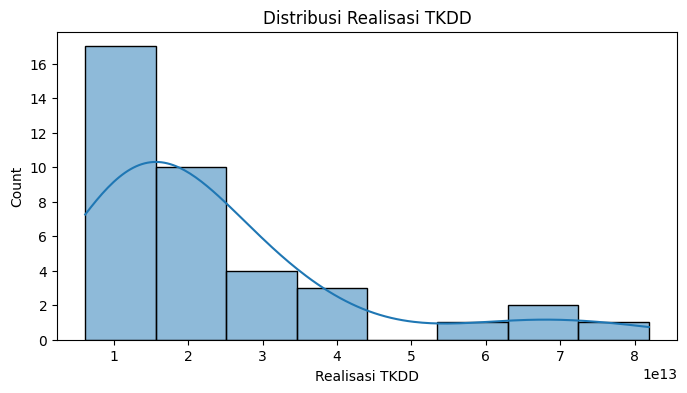

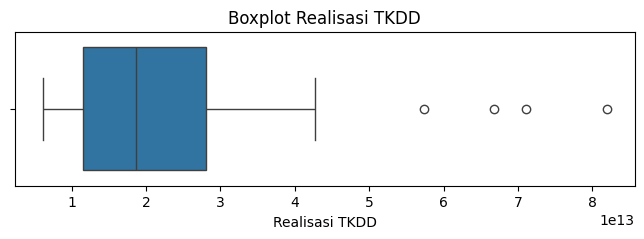

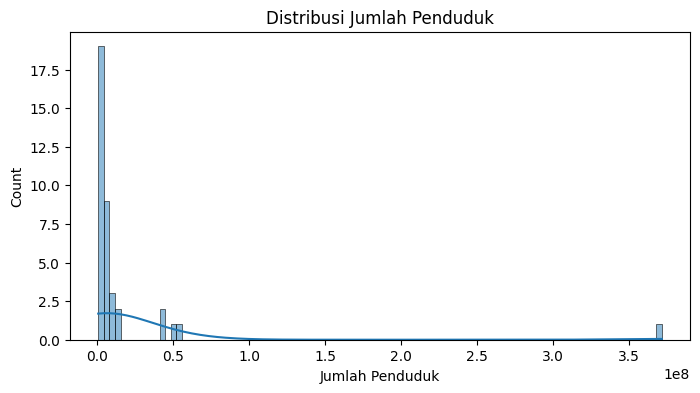

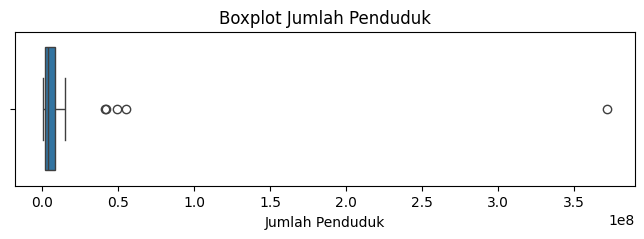

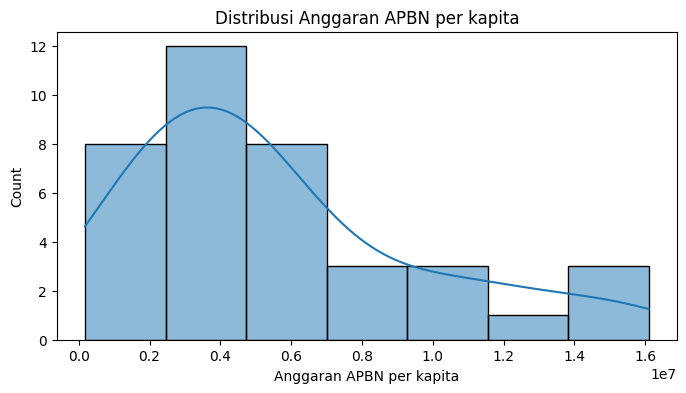

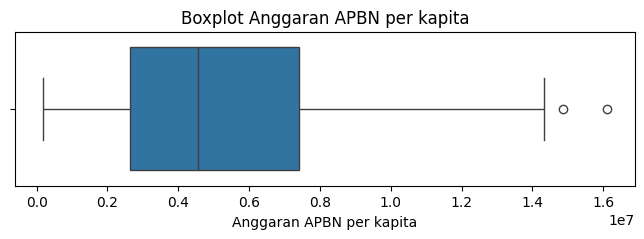

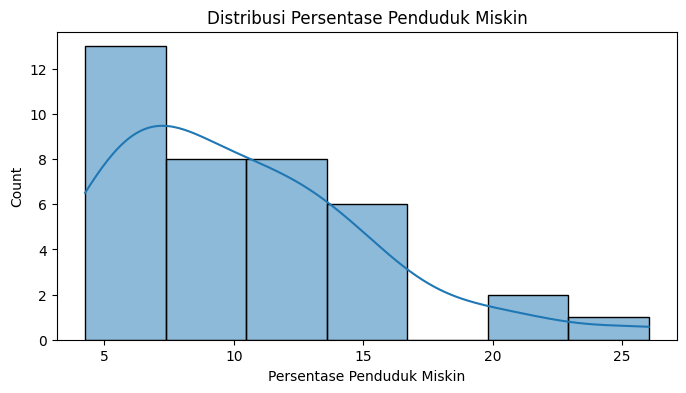

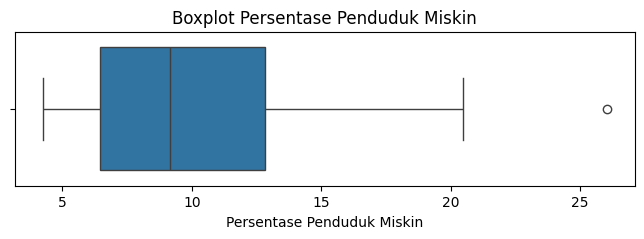

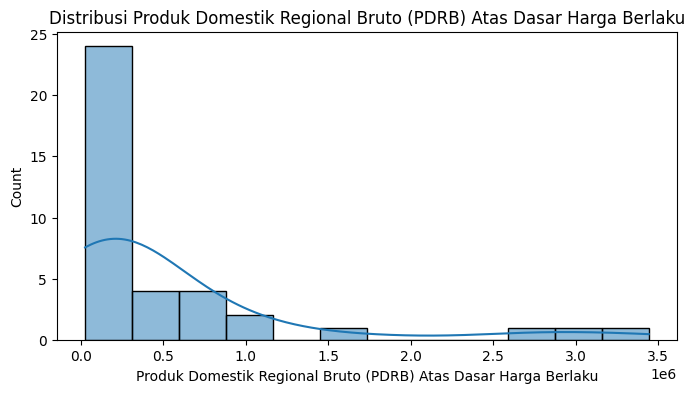

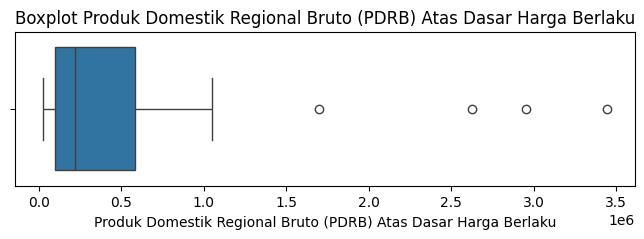

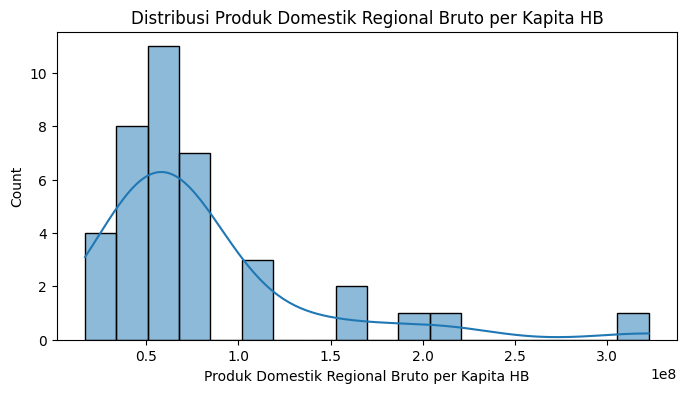

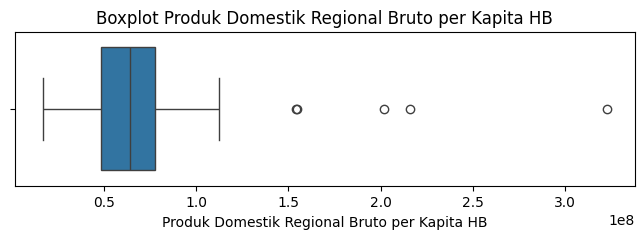

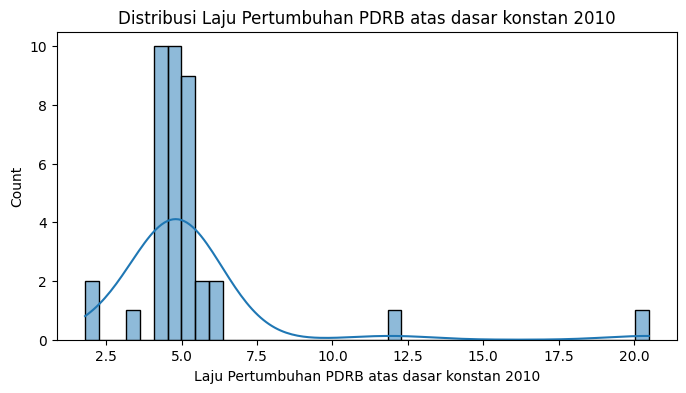

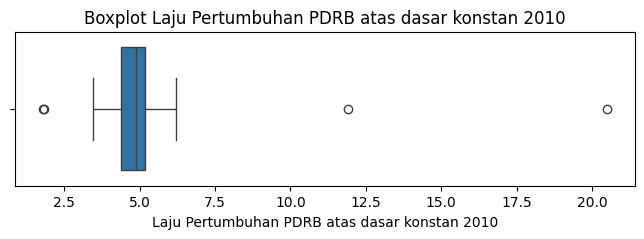

In [20]:
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

### Korelasi

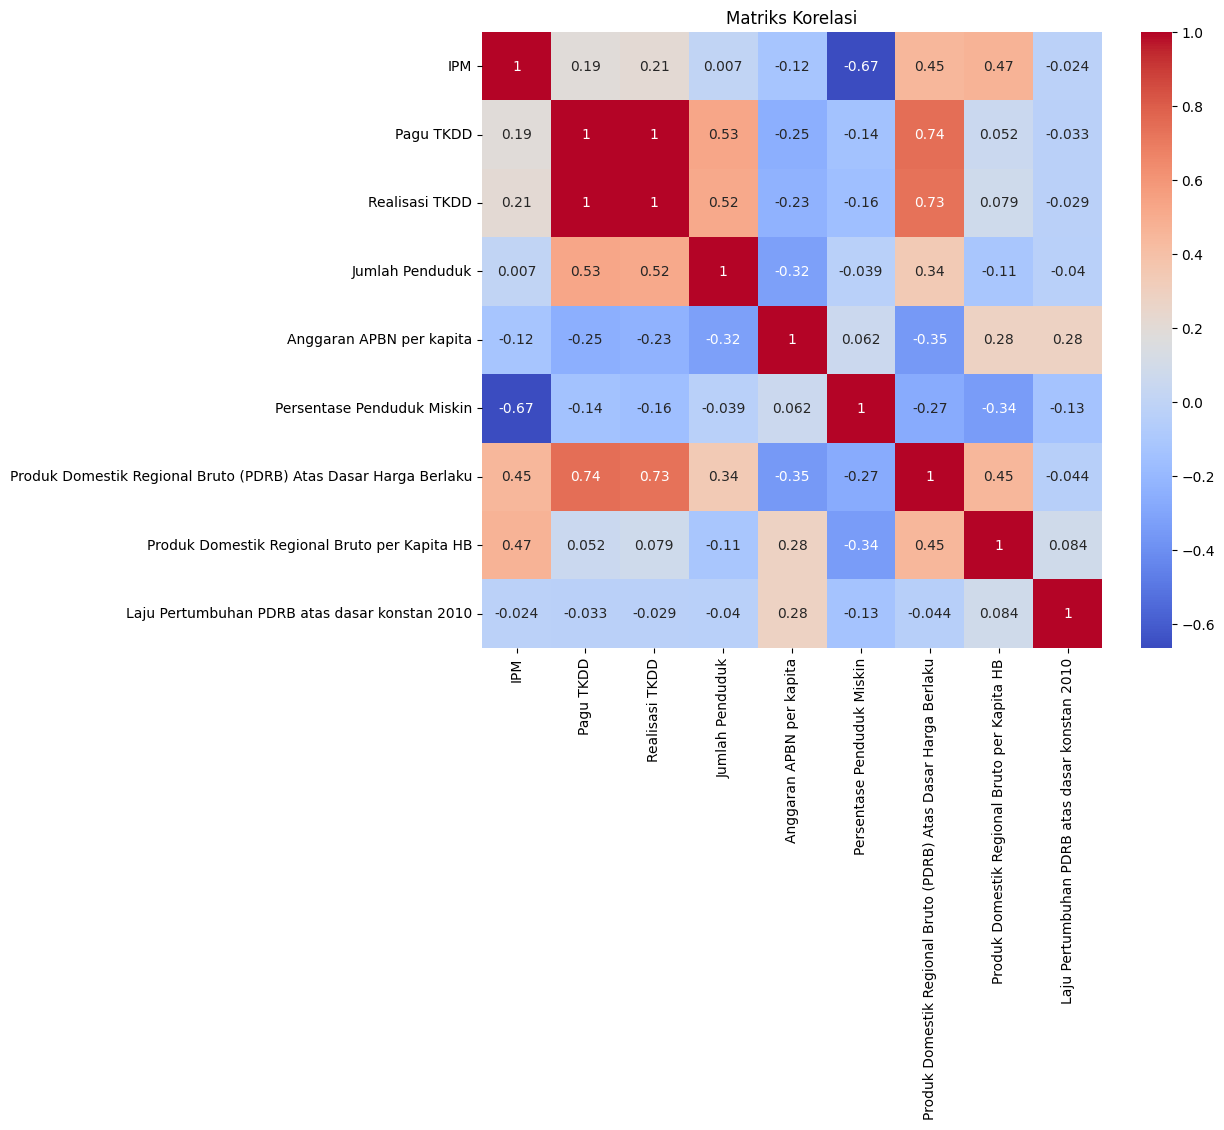

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

### Perbandingan antar provinsi

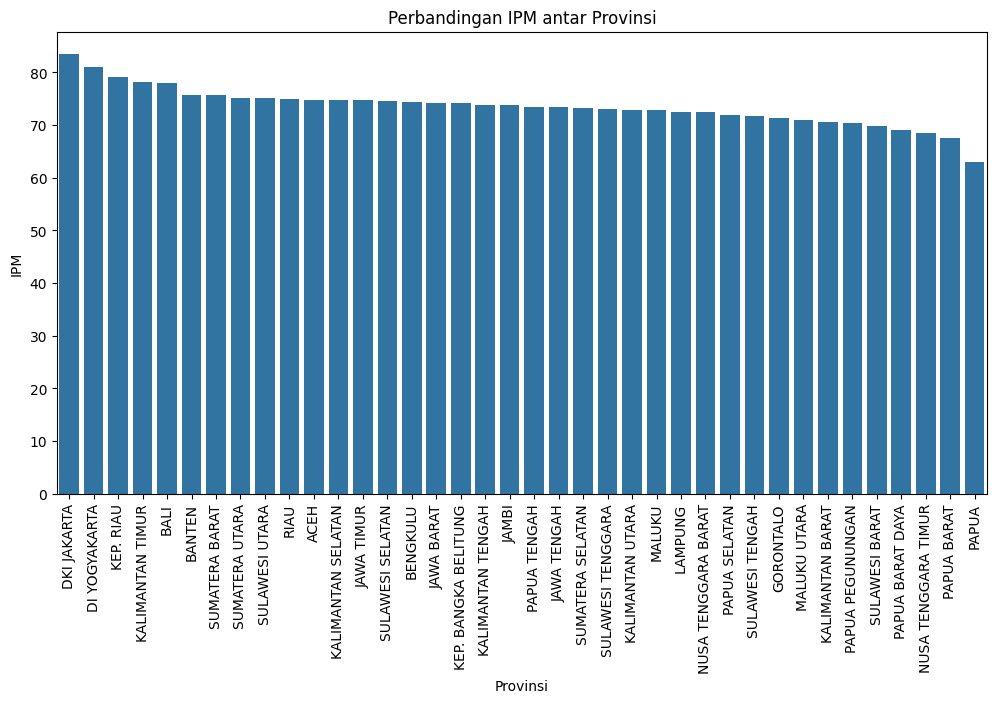

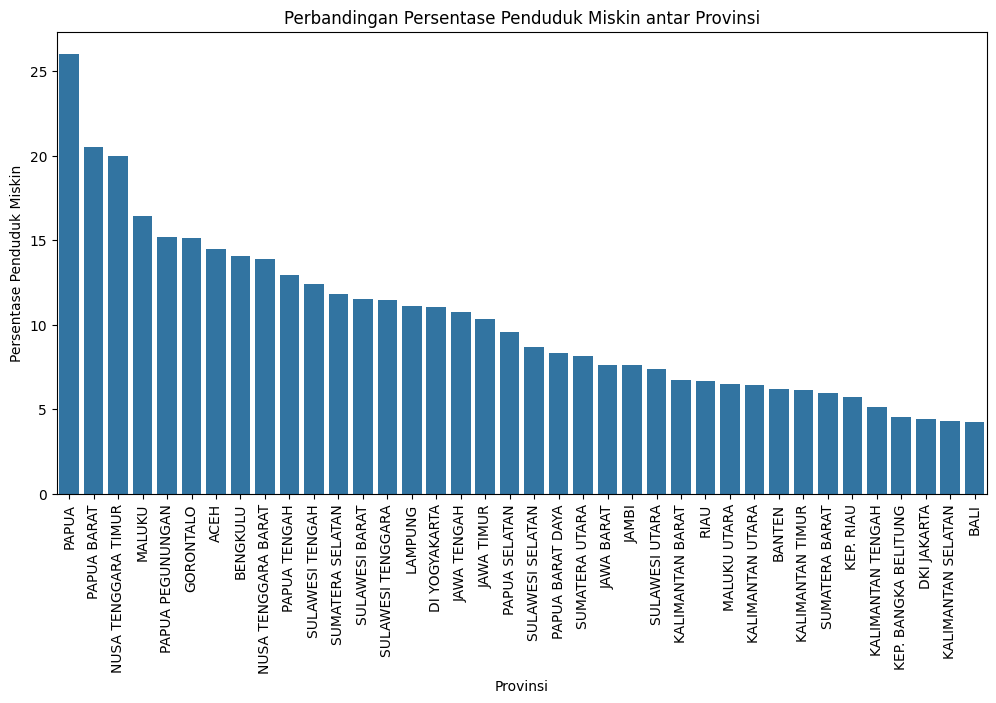

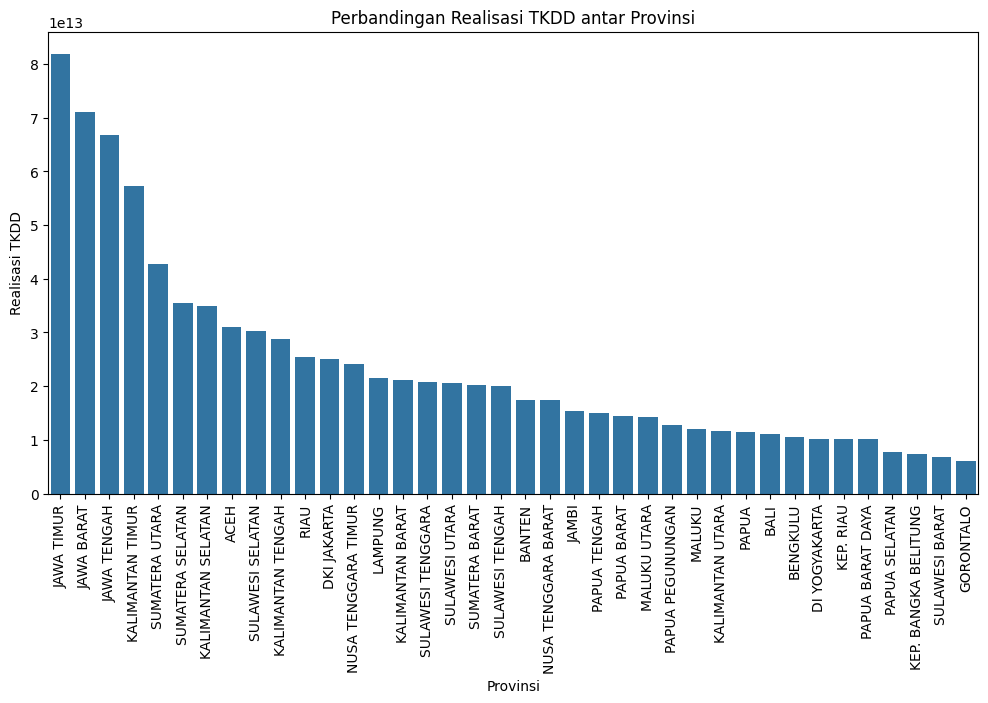

In [22]:
for col in ['IPM', 'Persentase Penduduk Miskin', 'Realisasi TKDD']:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Provinsi', y=col, data=df.sort_values(col, ascending=False))
    plt.xticks(rotation=90)
    plt.title(f'Perbandingan {col} antar Provinsi')
    plt.show()

### Pair plot

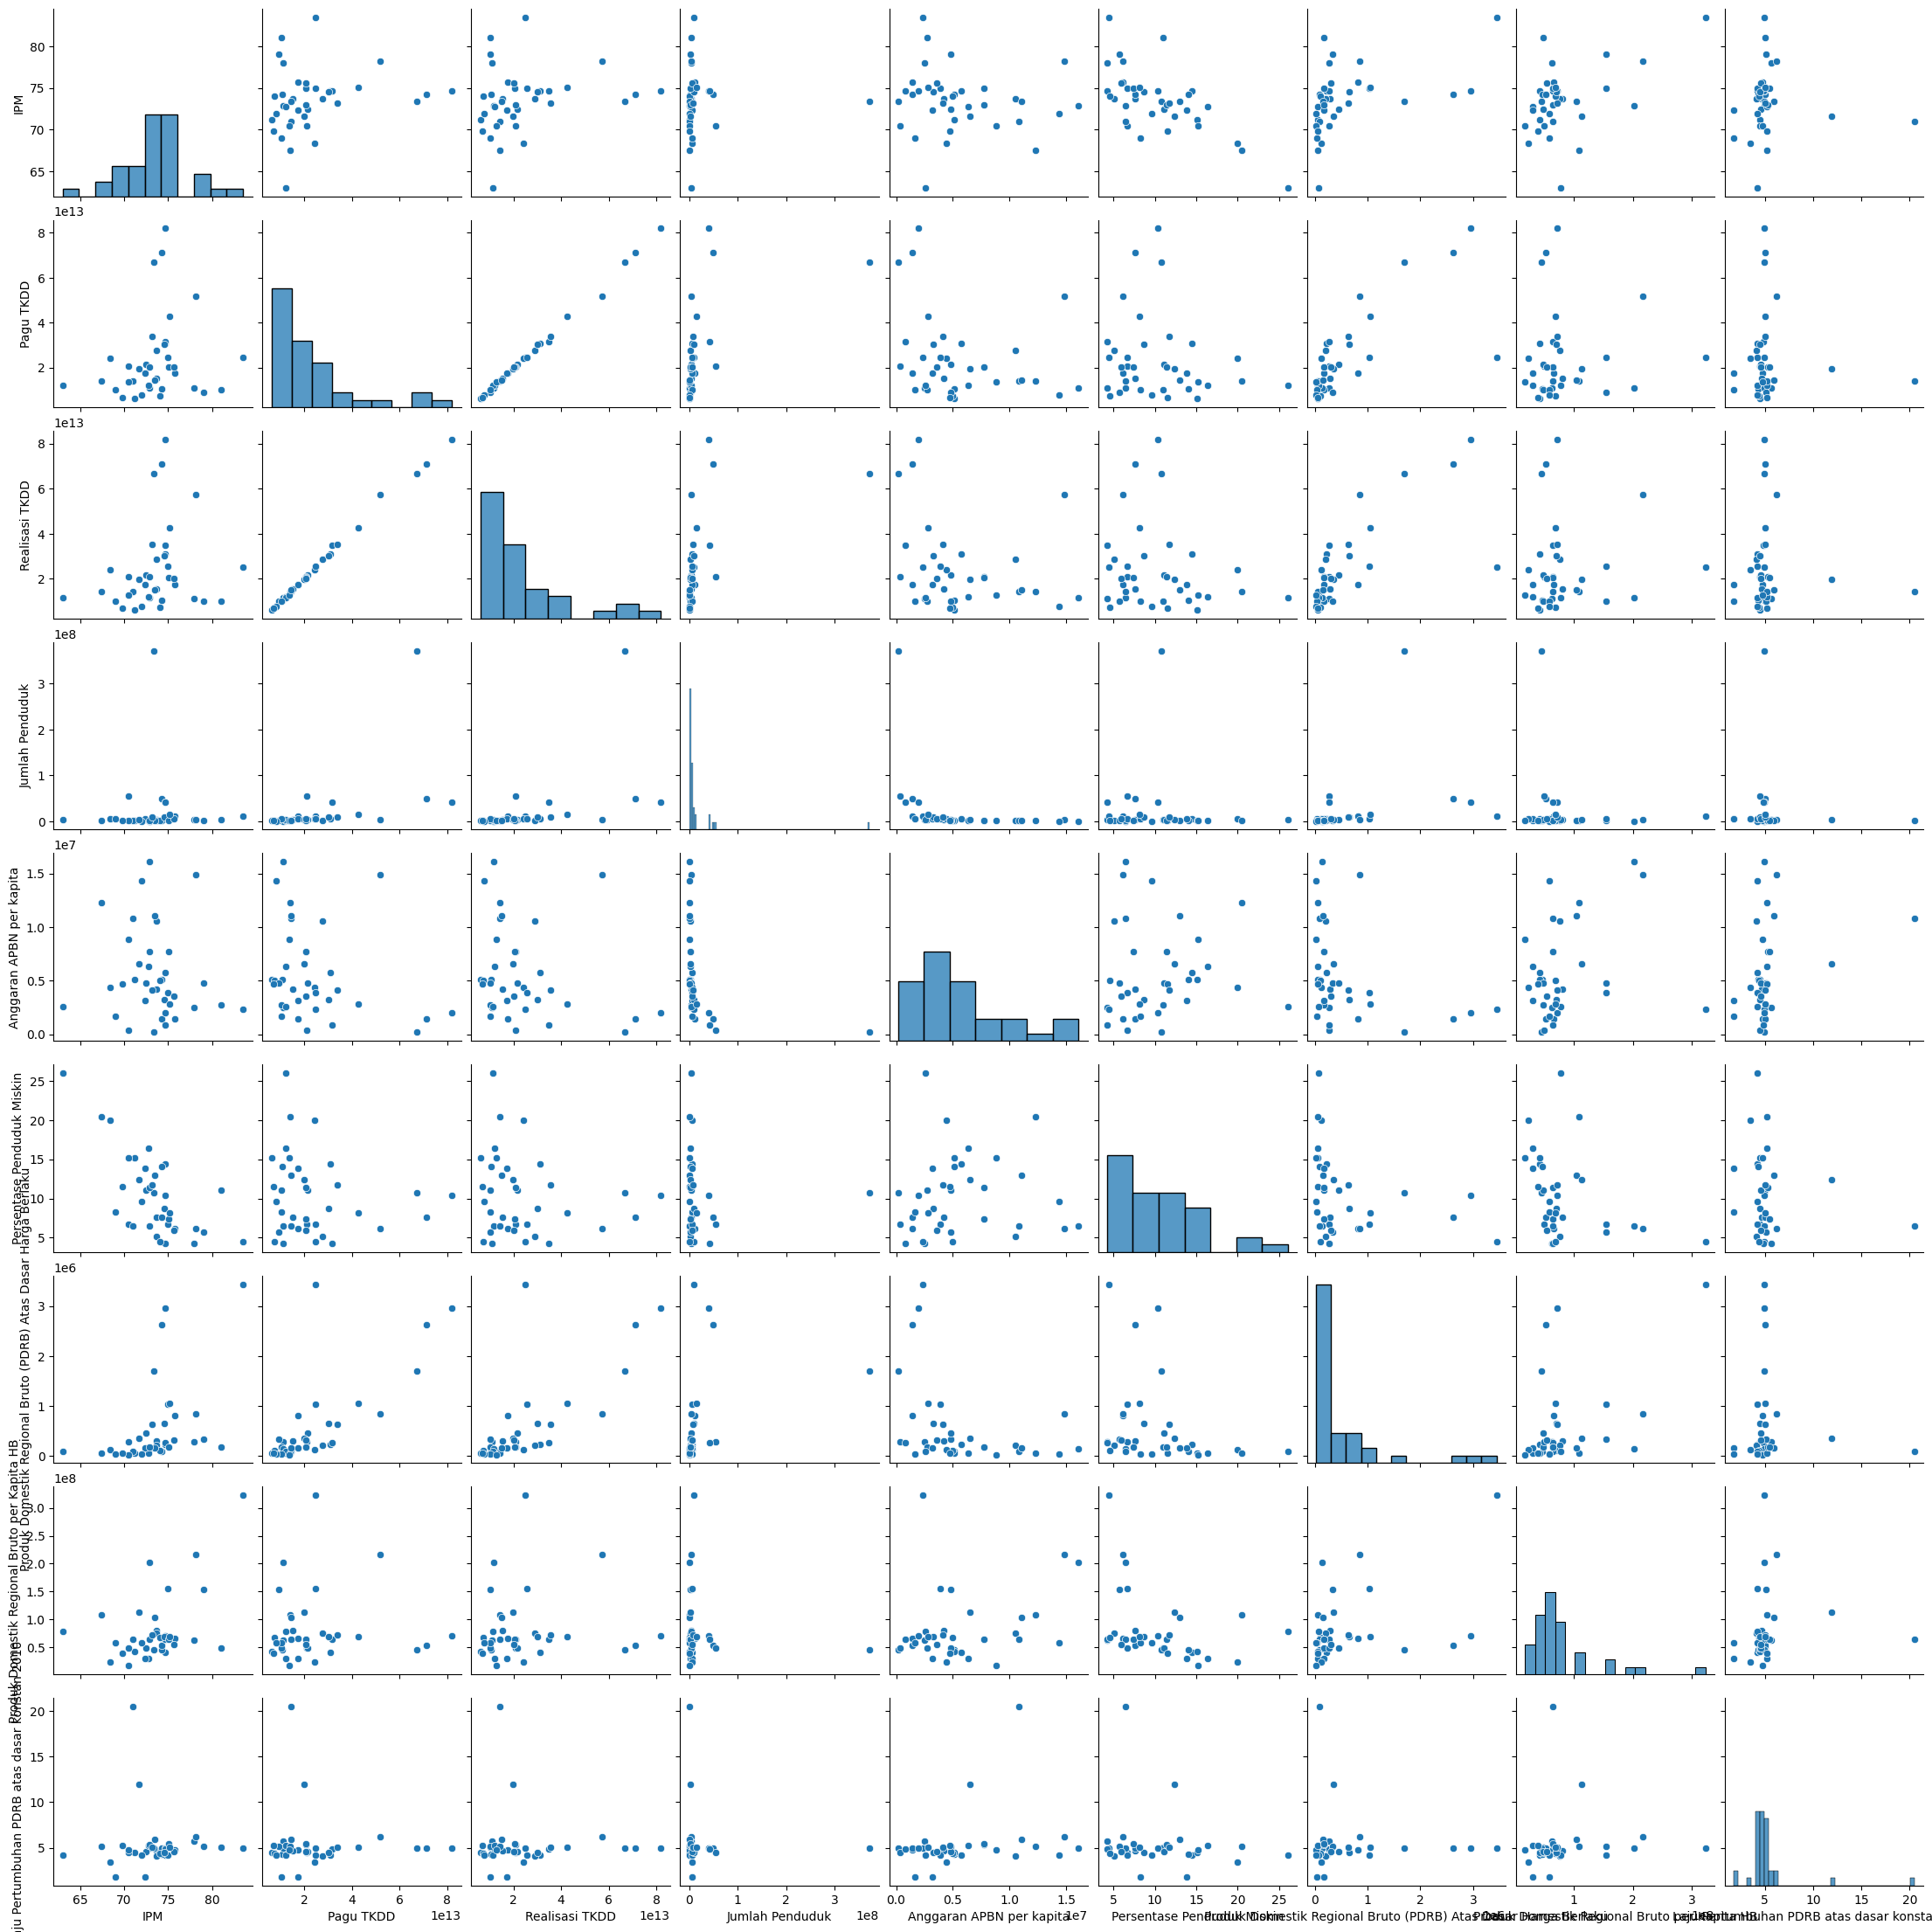

In [23]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

# Rumusan Masalah

## 1. Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023

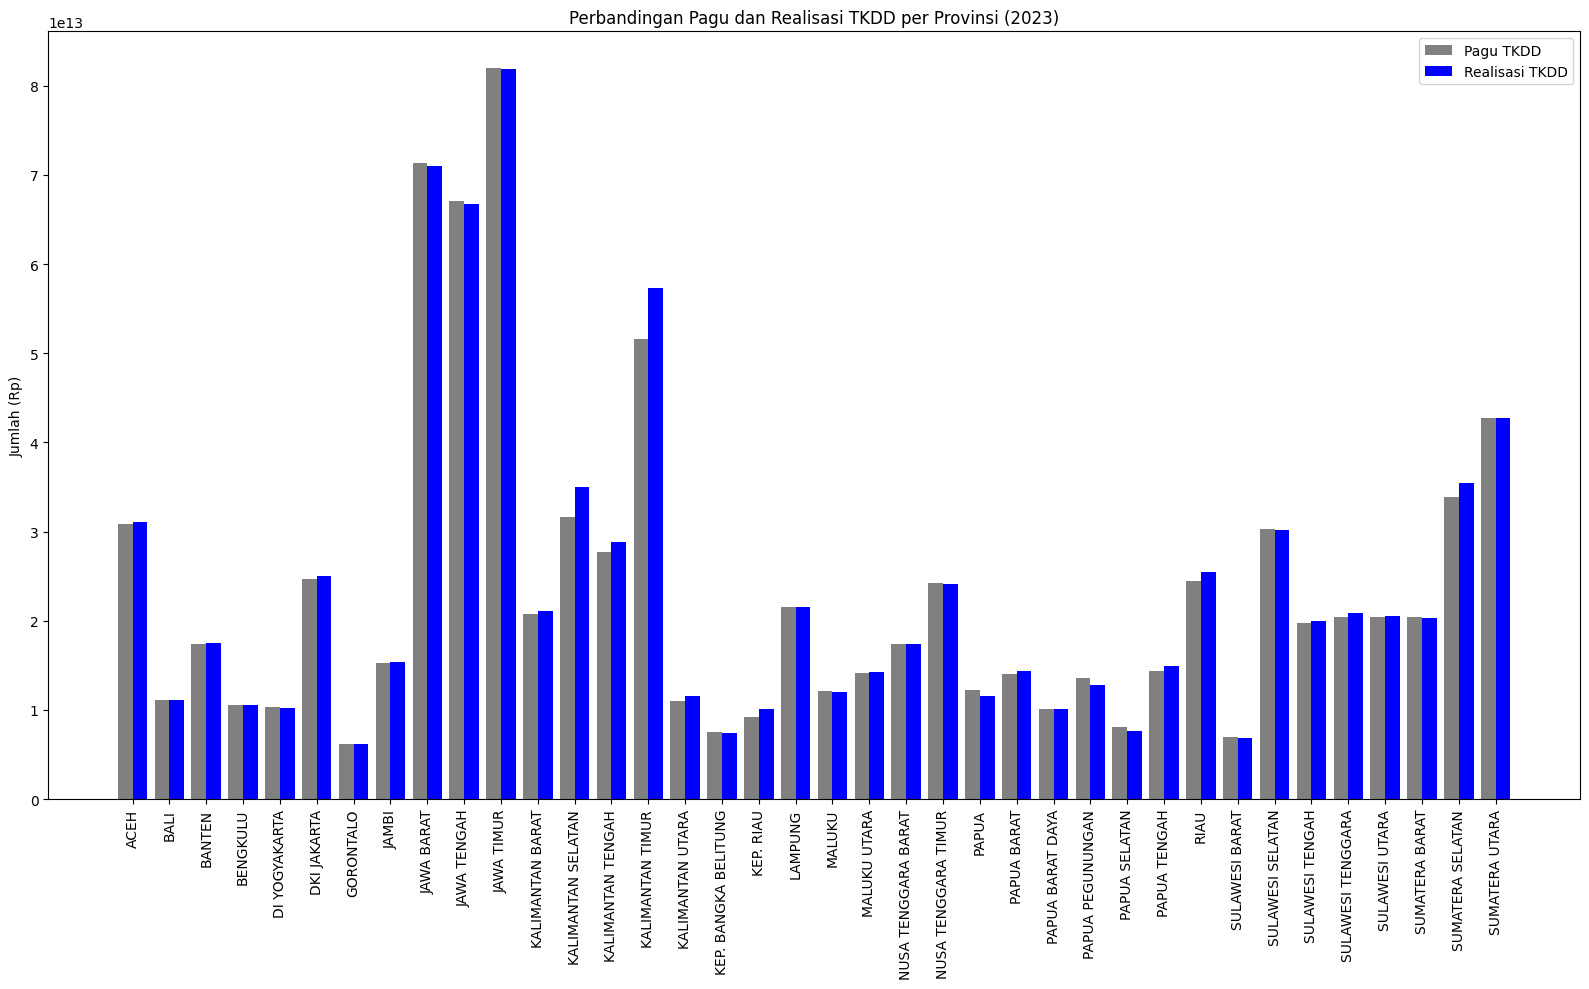

In [24]:
df.sort_values(by="Pagu TKDD", ascending=False)

provinsi = df["Provinsi"]
pagu = df["Pagu TKDD"]
realisasi = df["Realisasi TKDD"]

x = np.arange(len(provinsi))
width = 0.4  

plt.figure(figsize=(16, 10))
plt.bar(x - width/2, pagu, width, label="Pagu TKDD", color="gray")
plt.bar(x + width/2, realisasi, width, label="Realisasi TKDD", color="blue")

plt.ylabel("Jumlah (Rp)")
plt.title("Perbandingan Pagu dan Realisasi TKDD per Provinsi (2023)")
plt.xticks(x, provinsi, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
df["Tingkat Realisasi (%)"] = (df["Realisasi TKDD"] / df["Pagu TKDD"]) * 100

In [26]:
df.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Tingkat Realisasi (%)
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000.0,4.23,100.821116
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000.0,5.71,99.218713
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000.0,4.81,100.080214
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000.0,4.28,99.902650
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000.0,5.07,98.893574


C:\Users\natha\AppData\Local\Temp\ipykernel_3272\557941369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


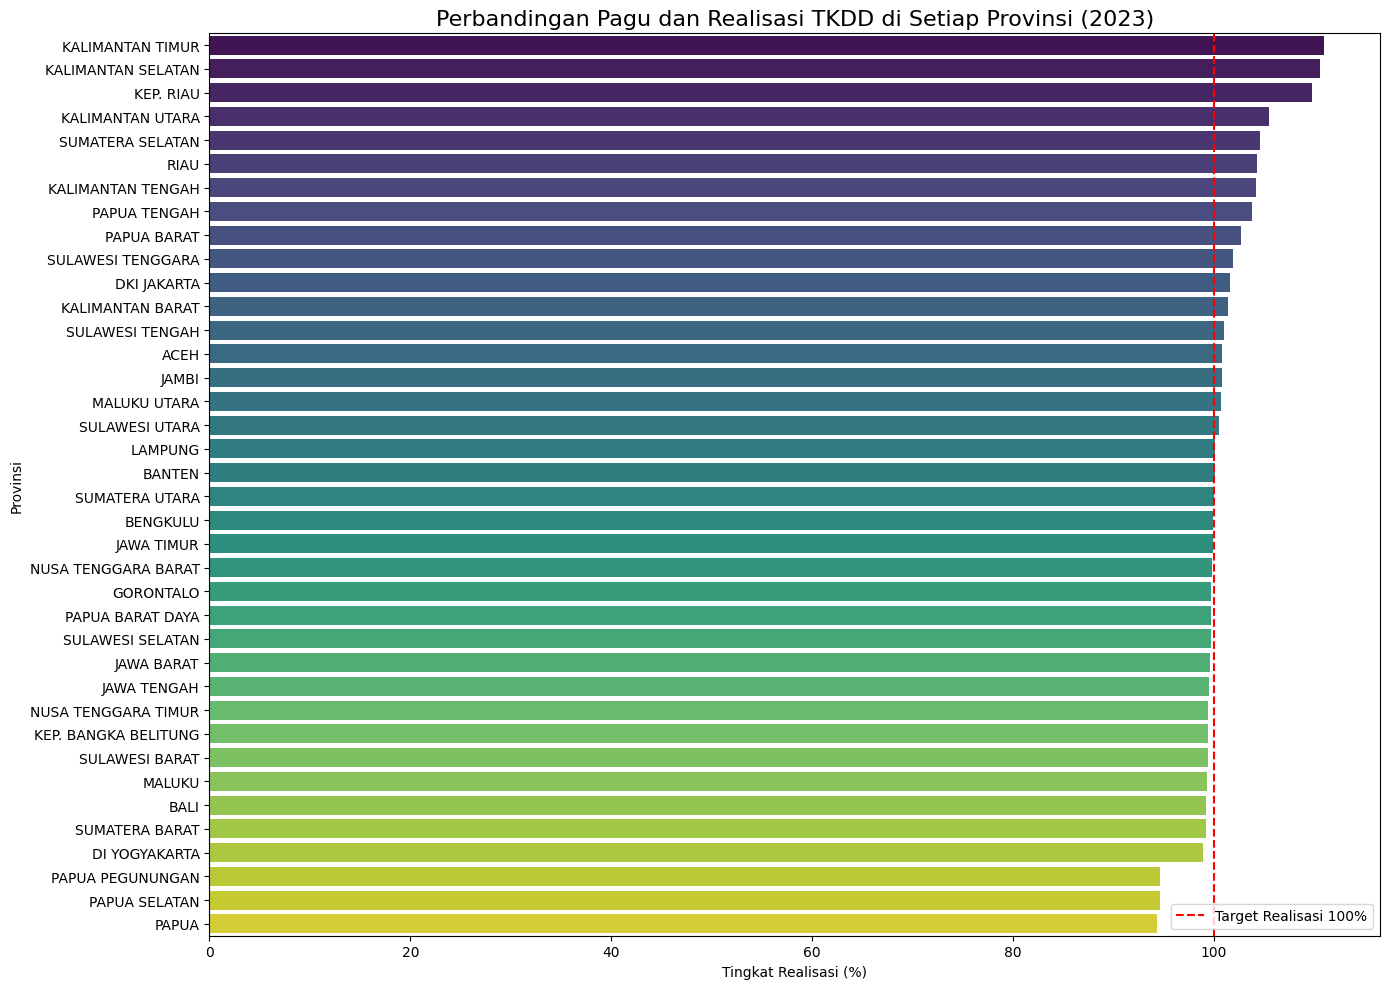

In [27]:
plt.figure(figsize=(14, 10))
sns.barplot(
    data=df.sort_values(by="Tingkat Realisasi (%)", ascending=False),
    x="Tingkat Realisasi (%)",
    y="Provinsi",
    palette="viridis"
)
plt.axvline(100, color='red', linestyle='--', label='Target Realisasi 100%')
plt.title("Perbandingan Pagu dan Realisasi TKDD di Setiap Provinsi (2023)", fontsize=16)
plt.xlabel("Tingkat Realisasi (%)")
plt.ylabel("Provinsi")
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan side by side bar plot antara pagu dan realisasi TKDD di setiap provinsi di Indonesia pada tahun 2023 menunjukkan bahwa sebagian besar provinsi memiliki nilai realisasi yang mendekati pagu. Namun, alokasi TKDD dapat dilihat masih belum merata, Provinsi dengan alokasi TKDD terbesar terpusat pada hanya beberapa provinsi besar di Pulau Jawa seperti Jawa Barat, Jawa Tengah, dan Jawa Timur. Hal ini menunjukkan ketimpangan yang nyata karena banyak provinsi seperti Gorontalo, Sulawesi Barat, serta pada Provinsi yang terletak di Pulau Papua menerima alokasi jauh lebih rendah yang dapat menyebabkan terjadinya ketimpangan pembangunan antarwilayah.

Tingkat Realisasi juga dapat dilihat dengan menghitung persentase realisasi terhadap pagu anggaran. Pada visualisasi terlihat bahwa secara umum tingkat realisasi yang mendekati pagu yang telah ditetapkan dengan berada pada rentang 94%-111%, dengan beberapa provinsi yang mendekati target ideal 100% yaitu Lampung (100.09%), Banten (100.08%), Sumatera Utara (100.02%), Bengkulu (99.90%). Realisasi tepat 100% menunjukkan ketepatan perencanaan dan pelaksanaan anggaran.



## 2. Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?

C:\Users\natha\AppData\Local\Temp\ipykernel_3272\2734619953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\natha\AppData\Local\Temp\ipykernel_3272\2734619953.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


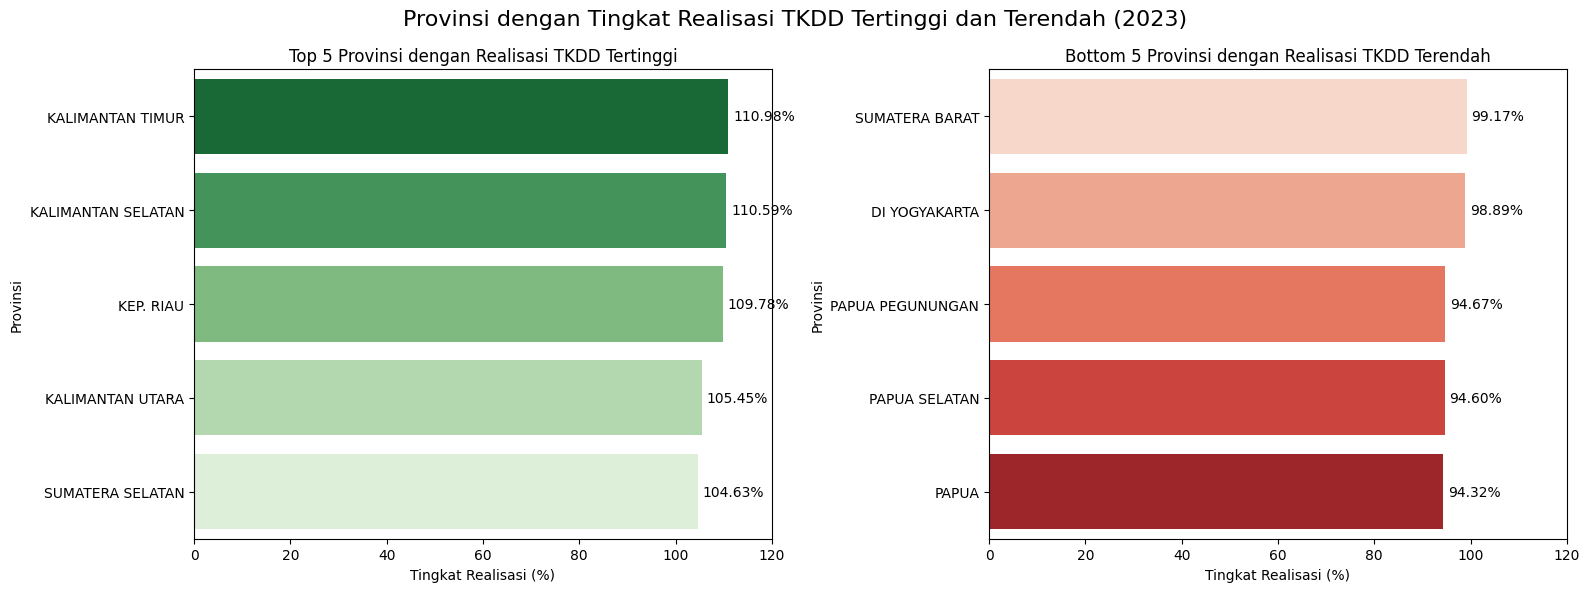

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 5
top5 = df.nlargest(5, "Tingkat Realisasi (%)").sort_values("Tingkat Realisasi (%)", ascending=False)
sns.barplot(
    data=top5,
    x="Tingkat Realisasi (%)",
    y="Provinsi",
    palette="Greens_r",
    ax=axes[0]
)
axes[0].set_title("Top 5 Provinsi dengan Realisasi TKDD Tertinggi")
axes[0].set_xlim(0, 120)
axes[0].set_xlabel("Tingkat Realisasi (%)")

for i, v in enumerate(top5["Tingkat Realisasi (%)"]):
    axes[0].text(v + 1, i, f"{v:.2f}%", color='black', va='center')

# Bottom 5
bottom5 = df.nsmallest(5, "Tingkat Realisasi (%)").sort_values("Tingkat Realisasi (%)", ascending=False)
sns.barplot(
    data=bottom5,
    x="Tingkat Realisasi (%)",
    y="Provinsi",
    palette="Reds",
    ax=axes[1]
)
axes[1].set_title("Bottom 5 Provinsi dengan Realisasi TKDD Terendah")
axes[1].set_xlim(0, 120)
axes[1].set_xlabel("Tingkat Realisasi (%)")

for i, v in enumerate(bottom5["Tingkat Realisasi (%)"]):
    axes[1].text(v + 1, i, f"{v:.2f}%", color='black', va='center')

plt.suptitle("Provinsi dengan Tingkat Realisasi TKDD Tertinggi dan Terendah (2023)", fontsize=16)
plt.tight_layout()
plt.show()


Berdasarkan visualisasi bar chart yang membandingkan lima provinsi dengan tingkat realisasi TKDD tertinggi dan terendah pada tahun 2023, dapat dilihat bahwa kelompok dengan realisasi tertinggi, posisi pertama ditempati oleh Kalimantan Timur dengan tingkat realisasi sebesar (110,98%), diikuti oleh Kalimantan Selatan (110,59%), Kepulauan Riau (109,78%), Kalimantan Utara (105,45%), dan Sumatera Selatan (104,63%). Hal ini menunjukkan terjadinya revisi anggaran atau terjadi penambahan dana, serta bisa menandakan bahwa perencanaan awal kurang akurat.

Ada pun lima provinsi dengan tingkat realisasi terendah terdiri dari Papua (94,32%), Papua Selatan (94,60%), Papua Pegunungan (94,67%), DI Yogyakarta (98,89%), dan Sumatera Barat (99,17%). Hal ini menunjukkan bahwa alokasi anggaran belum sepenuhnya dimanfaatkan.

Sehingga Provinsi dengan tingkat realisais tertinggi tahun 2023 adalah Kalimantan Timur dengan tingkat realisasi sebesar (110,98%) dan Provinsi dengan tingkat realisais terendah tahun 2023 adalah Papua dengan tingkat realisasi sebesar (94.32%)

## 3. Apa kemungkinan faktor-faktor yang memengaruhi tinggi-rendahnya realisasi TKDD

Berdasarkan heatmap korelasi, terdapat korelasi tinggi antara realisasi TKDD dengan beberapa variabel berikut:

- Pagu TKDD (r = 1.00): Ini wajar karena realisasi tentu tergantung pada besarnya pagu yang diberikan. Makin besar pagunya, makin besar kemungkinan realisasinya juga tinggi.
- Jumlah Penduduk (r = 0.68): Provinsi dengan jumlah penduduk besar cenderung mendapatkan dan merealisasikan TKDD yang lebih tinggi, kemungkinan karena kebutuhan pembiayaan lebih besar.
- PDRB Atas Dasar Harga Berlaku (r = 0.73): Daerah dengan aktivitas ekonomi tinggi cenderung juga merealisasikan anggaran TKDD lebih besar.
- Persentase Penduduk Miskin (r = -0.16): Korelasinya negatif lemah, tapi menunjukkan bahwa daerah dengan penduduk miskin lebih tinggi sedikit cenderung punya realisasi lebih rendah.

Kesimpulan:
Faktor yang paling memengaruhi tinggi-rendahnya realisasi TKDD adalah Pagu TKDD, jumlah penduduk, dan tingkat aktivitas ekonomi daerah yang direpresentasikan oleh PDRB. Ini terlihat langsung dari korelasi yang kuat pada heatmap. Namun, variabel lainnya seperti kemiskinan atau pertumbuhan ekonomi tampaknya tidak terlalu berperan besar.

C:\Users\natha\AppData\Local\Temp\ipykernel_3272\952510607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=realisasi_corr.values, y=realisasi_corr.index, palette="coolwarm")


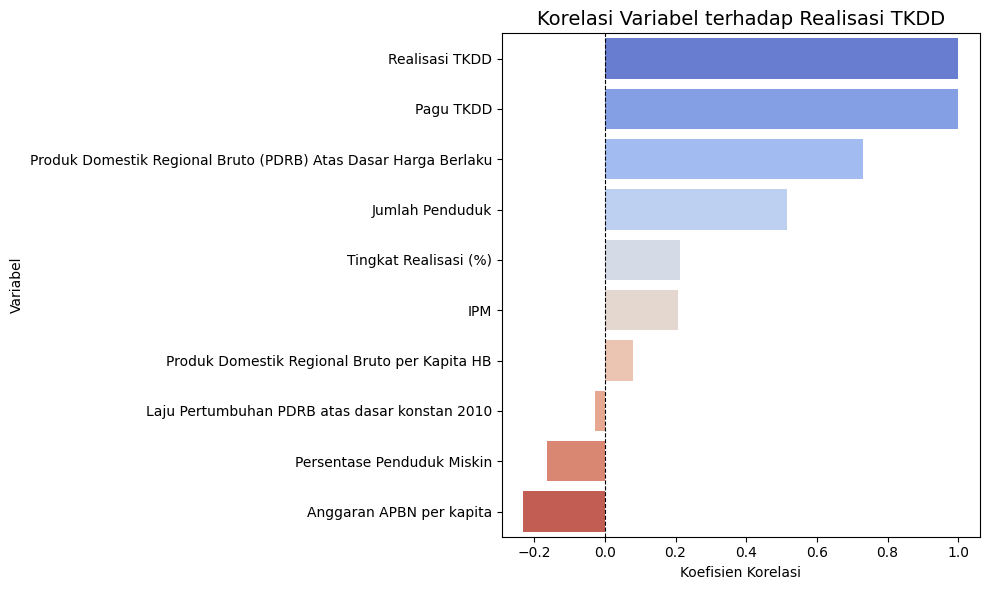

In [29]:
corr = df.corr(numeric_only=True)

realisasi_corr = corr["Realisasi TKDD"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=realisasi_corr.values, y=realisasi_corr.index, palette="coolwarm")
plt.title("Korelasi Variabel terhadap Realisasi TKDD", fontsize=14)
plt.xlabel("Koefisien Korelasi")
plt.ylabel("Variabel")
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

## 4. Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?

- Matriks Korelasi : Berdasarkan matriks korelasi, nilai korelasi antara Realisasi TKDD dan IPM adalah 0.21. Nilai ini termasuk rendah, sehingga hanya menunjukkan hubungan lemah positif.
- Pairplot : Jika dilihat dari pairplot, tidak tampak pola sebaran yang jelas antara realisasi TKDD dan IPM (Sebaran tergolong acak).

Interpretasi:
Terdapat hubungan positif yang sangat lemah antara realisasi TKDD dan IPM. Artinya, meskipun suatu provinsi merealisasikan TKDD yang besar, belum tentu berdampak secara signifikan terhadap kenaikan IPM.

Rekomendasi:
Ada faktor-faktor penting yang tidak tersedia dalam dataset, seperti kualitas belanja publik, efektivitas penggunaan dana, sektor pendidikan dan kesehatan secara lebih rinci, serta intervensi lainnya sehingga realisasi TKDD saja belum cukup untuk menjelaskan variasi IPM. (dapat dijelaskan oleh variabel lain)

Catatan : TKDD mempengaruhi IPM, namun tidak cukup TKDD saja (perlu dikombinasikan dengan fitur-fitur lain)

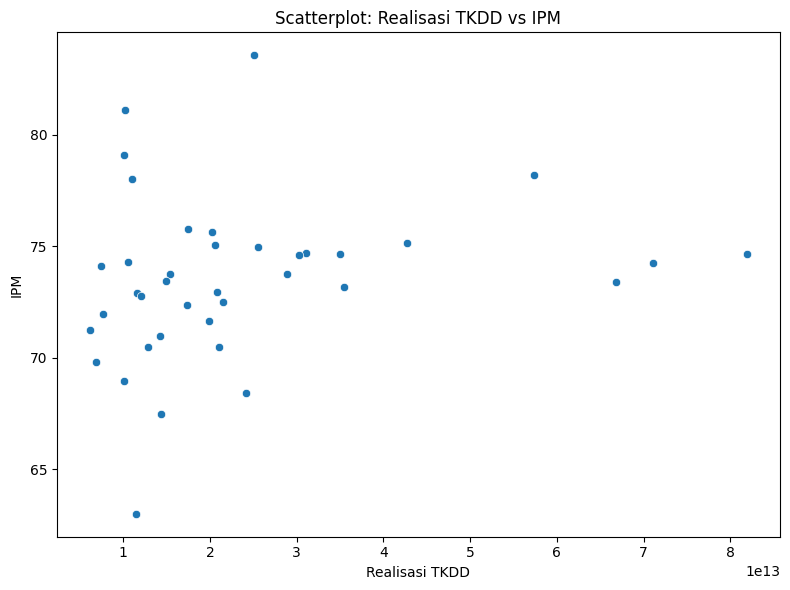

Korelasi antara Realisasi TKDD dan IPM: 0.21


In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Realisasi TKDD", y="IPM")
plt.title("Scatterplot: Realisasi TKDD vs IPM")
plt.xlabel("Realisasi TKDD")
plt.ylabel("IPM")
plt.tight_layout()
plt.show()

correlation = df["Realisasi TKDD"].corr(df["IPM"])
print(f"Korelasi antara Realisasi TKDD dan IPM: {correlation:.2f}")

## 5. Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?

Berdasarkan hasil EDA, berikut variabel yang menunjukkan korelasi yang relatif signifikan terhadap IPM:

- Produk Domestik Regional Bruto per Kapita HB (r = 0.47): Ini menunjukkan bahwa makin tinggi pendapatan per kapita suatu daerah, maka semakin tinggi IPM-nya.
- PDRB Atas Dasar Harga Berlaku (r = 0.45): Aktivitas ekonomi secara komprehensif juga berhubungan positif dengan IPM.
- Persentase Penduduk Miskin (r = -0.67): Korelasi negatif kuat menunjukkan bahwa semakin besar persentase penduduk miskin, semakin rendah IPM suatu daerah.
- Anggaran APBN per Kapita (r = -0.12): Korelasi negatif lemah, artinya semakin besar anggaran per kapita belum tentu akan memberikan peningkatan pada IPM.
- Jumlah Penduduk dan Realisasi TKDD memiliki korelasi yang sangat lemah (r = 0.048 dan 0.21): Hal ini menunjukkan hampir tidak ada korelasi sehingga tidak cukup kuat untuk menjelaskan IPM.

Kesimpulan:
- Faktor ekonomi seperti pendapatan per kapita dan PDRB berkontribusi positif terhadap IPM.
- Kemiskinan adalah faktor yang sangat penting dan berkorelasi kuat secara negatif terhadap IPM.
- Realisasi TKDD dan anggaran per kapita tampaknya tidak berdampak langsung, menunjukkan bahwa jumlah dana saja tidak cukup tanpa efektivitas dalam implementasi nyata.

Rekomendasi:
Untuk memahami IPM secara lebih utuh, perlu ditambahkan variabel-variabel lain seperti rata-rata lama sekolah, harapan hidup, akses layanan dasar, serta indikator kualitas belanja publik. Tanpa ini, model yang dibangun dari dataset ini belum sepenuhnya merepresentasikan IPM.

C:\Users\natha\AppData\Local\Temp\ipykernel_3272\1318730230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ipm_corr.values, y=ipm_corr.index, palette="viridis")


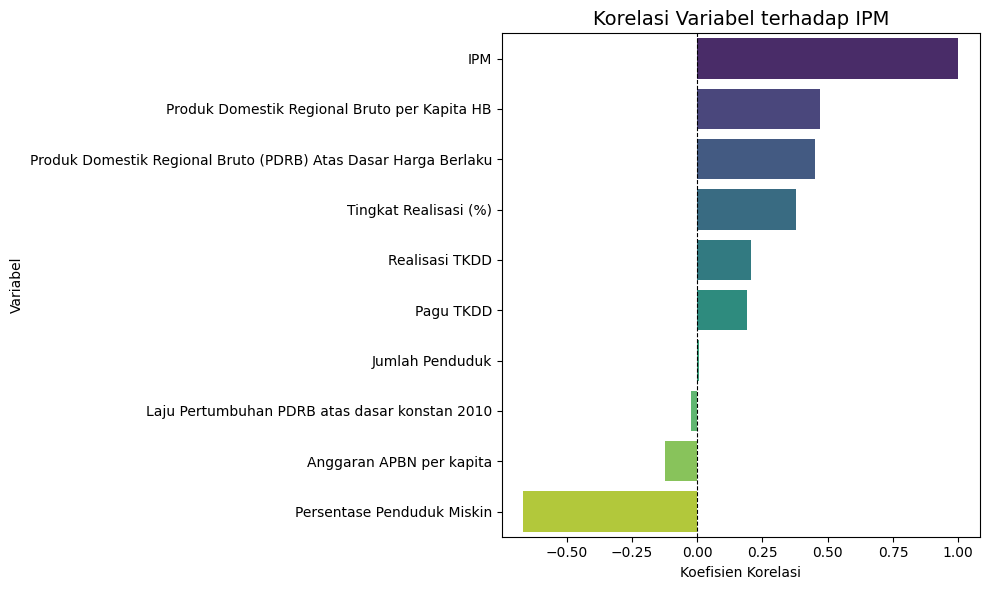

In [31]:
ipm_corr = df.corr(numeric_only=True)["IPM"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=ipm_corr.values, y=ipm_corr.index, palette="viridis")
plt.title("Korelasi Variabel terhadap IPM", fontsize=14)
plt.xlabel("Koefisien Korelasi")
plt.ylabel("Variabel")
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

# Hal yang diminta

## Analisis perbandingan pagu TKDD dan realisasi TKDD

Pagu TKDD (Transfer ke Daerah dan Dana Desa) merupakan alokasi anggaran yang direncanakan pemerintah pusat untuk disalurkan ke daerah, sedangkan Realisasi TKDD adalah jumlah dana yang benar-benar telah disalurkan atau digunakan oleh daerah. Berdasarkan data yang telah dibersihkan, kita dapat membandingkan antara pagu dan realisasi untuk melihat efektivitas penyaluran dana. Jika realisasi mendekati atau sama dengan pagu, maka penyerapan anggaran di daerah tersebut dapat dikatakan optimal. Sebaliknya, jika realisasi jauh di bawah pagu, maka ada indikasi penyerapan anggaran yang kurang maksimal, yang bisa disebabkan oleh berbagai faktor seperti kendala administrasi, kapasitas daerah, atau hambatan lain.

Total Pagu TKDD: 887,742,055,000,000
Total Realisasi TKDD: 901,410,995,000,000
Persentase Realisasi terhadap Pagu: 101.54%


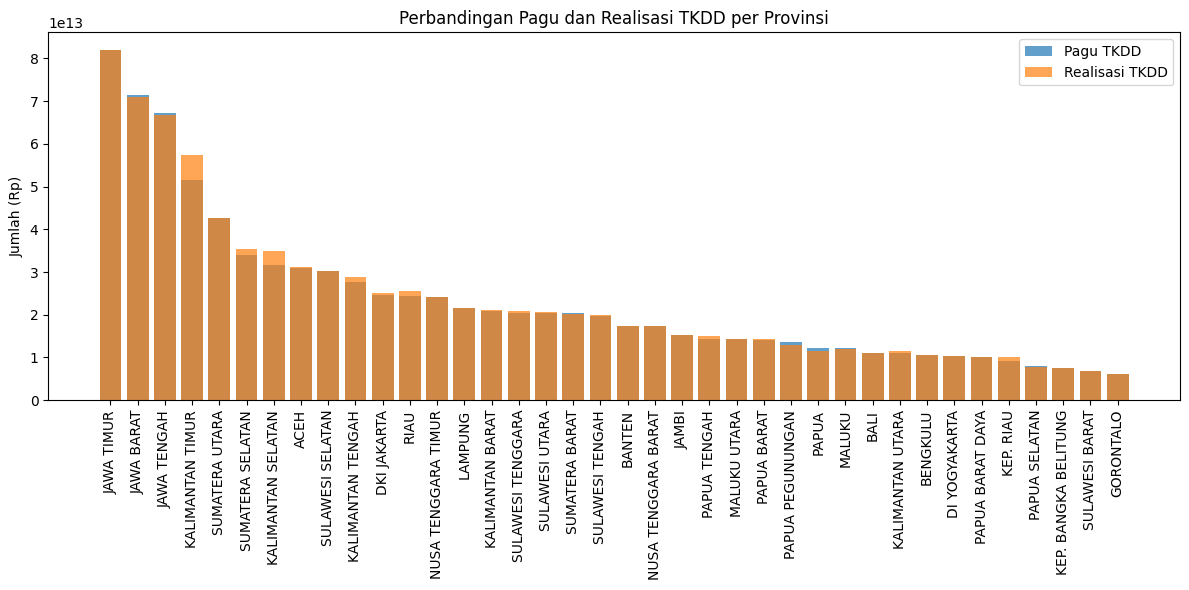

In [32]:
total_pagu = df['Pagu TKDD'].sum()
total_realisasi = df['Realisasi TKDD'].sum()
persentase_realisasi = (total_realisasi / total_pagu) * 100

print(f"Total Pagu TKDD: {total_pagu:,.0f}")
print(f"Total Realisasi TKDD: {total_realisasi:,.0f}")
print(f"Persentase Realisasi terhadap Pagu: {persentase_realisasi:.2f}%")

# Visualisasi perbandingan per provinsi
plt.figure(figsize=(12,6))
df_sorted = df.sort_values('Pagu TKDD', ascending=False)
plt.bar(df_sorted['Provinsi'], df_sorted['Pagu TKDD'], label='Pagu TKDD', alpha=0.7)
plt.bar(df_sorted['Provinsi'], df_sorted['Realisasi TKDD'], label='Realisasi TKDD', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Jumlah (Rp)')
plt.title('Perbandingan Pagu dan Realisasi TKDD per Provinsi')
plt.legend()
plt.tight_layout()
plt.show()

Setelah dilakukan perhitungan antara pagu TKDD dan realisasi TKDD, didapatkan hasil sebesar 101.54% yang artinya sudah sangat optimal dan terdapat beberapa kondisi di mana realisasi TKDD melebihi pagu TKDD. Hal ini dapat terjadi karena beberapa alasan seperti kesalahan pada input data dari sumber atau beberapa daerah mendapatkan dana tambahan dan lain sebagainya.

## Menghitung persentase realisasi TKDD dari tiap provinsi dan mengklasifikasikannya menjadi 3 kategori:
- Dibawah 90%
- Diantara 90%-100%
- Diatas 100%

In [33]:
df["Tingkat Realisasi (%)"] = (df["Realisasi TKDD"] / df["Pagu TKDD"]) * 100

In [34]:
def klasifikasi_realisasi(persen):
    if persen < 90:
        return "Di bawah 90%"
    elif 90 <= persen <= 100:
        return "Di antara 90-100%"
    else:
        return "Di atas 100%"

df["Kategori Realisasi"] = df["Tingkat Realisasi (%)"].apply(klasifikasi_realisasi)

print(df["Kategori Realisasi"].value_counts())

for kategori in ["Di bawah 90%", "Di antara 90-100%", "Di atas 100%"]:
    print(f"\nProvinsi dengan realisasi {kategori}:")
    print(df[df["Kategori Realisasi"] == kategori][["Provinsi", "Tingkat Realisasi (%)"]])

Kategori Realisasi
Di atas 100%         20
Di antara 90-100%    18
Name: count, dtype: int64

Provinsi dengan realisasi Di bawah 90%:
Empty DataFrame
Columns: [Provinsi, Tingkat Realisasi (%)]
Index: []

Provinsi dengan realisasi Di antara 90-100%:
                Provinsi  Tingkat Realisasi (%)
1                   BALI              99.218713
3               BENGKULU              99.902650
4          DI YOGYAKARTA              98.893574
6              GORONTALO              99.724419
8             JAWA BARAT              99.593294
9            JAWA TENGAH              99.467255
10            JAWA TIMUR              99.894633
16  KEP. BANGKA BELITUNG              99.422072
19                MALUKU              99.312279
21   NUSA TENGGARA BARAT              99.797387
22   NUSA TENGGARA TIMUR              99.446227
23                 PAPUA              94.322171
25      PAPUA BARAT DAYA              99.690657
26      PAPUA PEGUNUNGAN              94.673466
27         PAPUA SELATAN       

Didapatkan hasil kategori sebagai berikut.
- Dibawah 90%: tidak ada
- Diantara 90% - 100%: 18 provinsi
- Diatas 100%: 20 provinsi

Secara umum, tingkat realisasi TKDD di seluruh provinsi tergolong sangat tinggi, menunjukkan bahwa daerah mampu menyerap dana transfer dan dana desa dengan baik selama periode pengamatan. Namun, tingginya realisasi anggaran ini tidak otomatis mencerminkan efektivitas pemanfaatannya terutama jika dikaitkan dengan kualitas pembangunan manusia atau IPM, yang dalam analisis sebelumnya hanya menunjukkan korelasi lemah.

## Menganalisis faktor-faktor yang dapat memengaruhi realisasi TKDD

### Korelasi

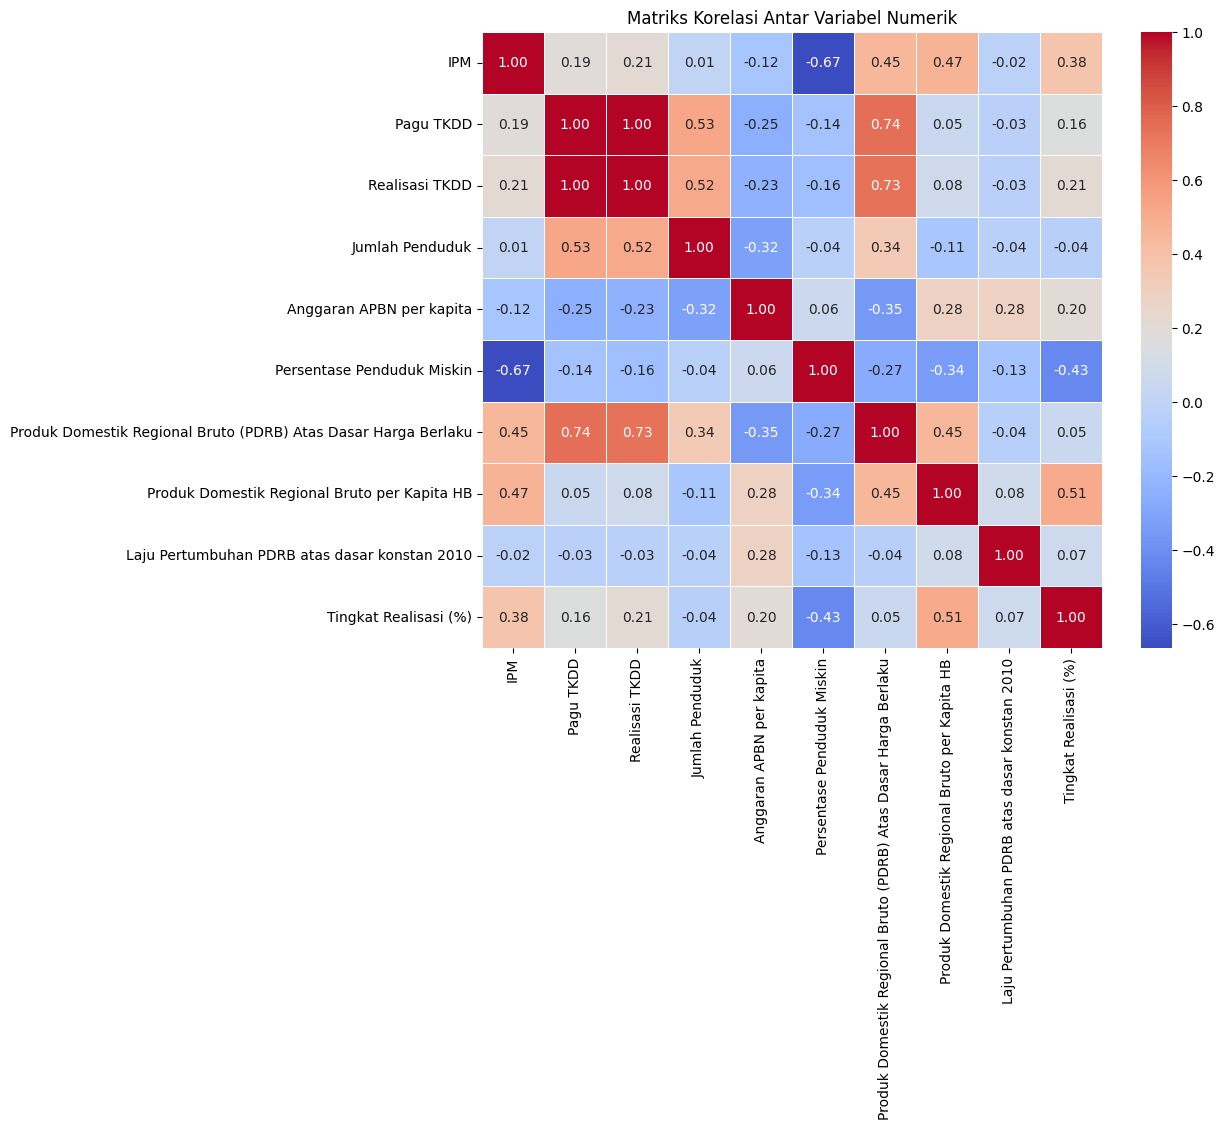

Korelasi variabel terhadap Realisasi TKDD:
Realisasi TKDD                                                    1.000000
Pagu TKDD                                                         0.998197
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0.731587
Jumlah Penduduk                                                   0.515147
Tingkat Realisasi (%)                                             0.211578
IPM                                                               0.206690
Produk Domestik Regional Bruto per Kapita HB                      0.079200
Laju Pertumbuhan PDRB atas dasar konstan 2010                    -0.029168
Persentase Penduduk Miskin                                       -0.162827
Anggaran APBN per kapita                                         -0.230443
Name: Realisasi TKDD, dtype: float64


In [35]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

print("Korelasi variabel terhadap Realisasi TKDD:")
print(corr["Realisasi TKDD"].sort_values(ascending=False))

### Regresi linier berganda

In [36]:
indep_vars = [
    'Pagu TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010',
    'IPM'
]

indep_vars = [col for col in indep_vars if col in df.columns]

X = df[indep_vars]
y = df['Realisasi TKDD']

# Tambahkan konstanta (intercept)
X = sm.add_constant(X)

# Fit model regresi linier
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Realisasi TKDD   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3994.
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           9.73e-43
Time:                        18:39:27   Log-Likelihood:                -1083.9
No. Observations:                  38   AIC:                             2184.
Df Residuals:                      30   BIC:                             2197.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Setelah melakukan perhitungan korelasi, Realisasi TKDD memiliki hubungan kuat pada variabel
- Pagu TKDD: 0.998197
- Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku: 0.731587
- Jumlah Penduduk: 0.515147

Untuk melihat tingkat signifikan, dapat menggunakan p-value < 0,05 dan didapatkan
- Pagu TKDD: 0.000
- PDRB atas dasar harga berlaku: 0.000
- PDRB per kapita HB: 0.000

Nilai korelasi dan p-value mengukur hal yang berbeda: yang satu kekuatan hubungan, yang satu signifikansi statistiknya. Sehingga perbedaan nilai dapat dimaklumkan karena bisa saja dari keragaman data

## Analisis hubungan realisasi TKDD dengan IPM

Hubungan antara Realisasi TKDD dengan IPM pada perhitungan korelasi merupakan hubungan positif yang lemah. Hubungan ini mengartikan bahwa jika satu variabel naik, maka variabel lain akan cenderung naik tapi tidak selalu naik. Peningkatan IPM tidak terlalu terkait langsung dengan peningkatan realisasi TKDD